# Predicting avocado prices using facebook prophet

# importing the libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import random 
import matplotlib.pyplot as plt
from fbprophet import Prophet

# importing the dataset

In [4]:
avocado_df = pd.read_csv('avocado.csv')

In [5]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


# exploring the dataset

In [6]:
avocado_df = avocado_df.sort_values("Date")
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2807,51,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
1195,51,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


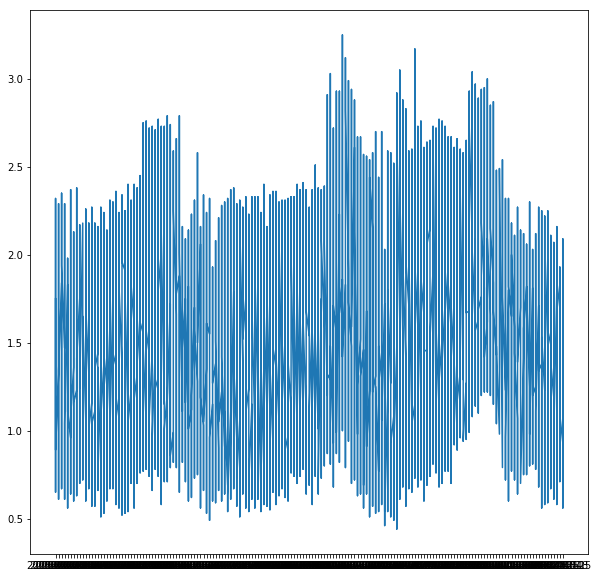

In [8]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df['Date'],avocado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

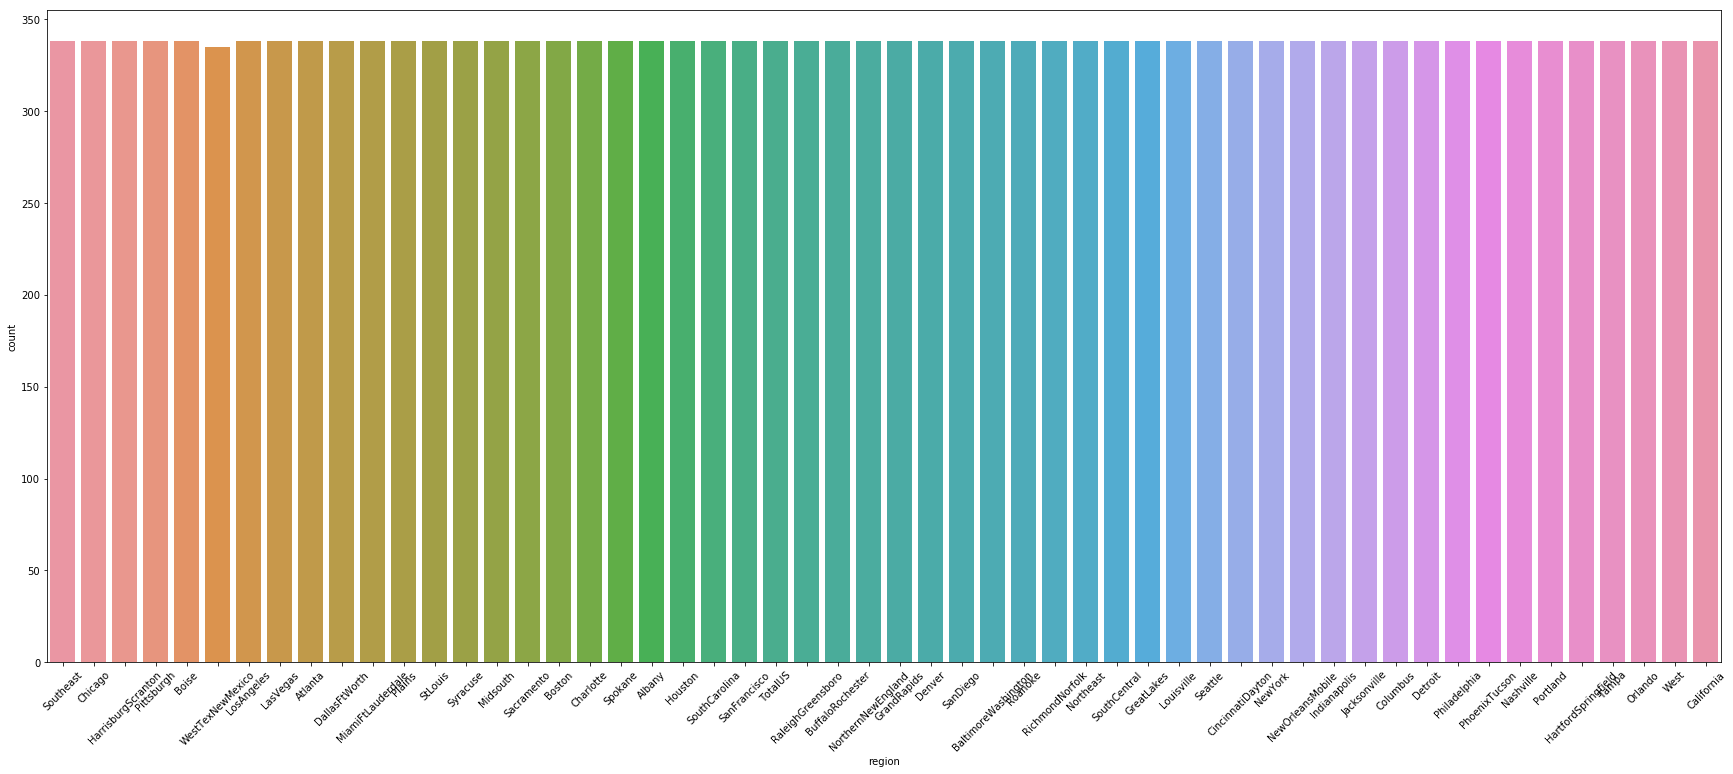

In [10]:
plt.figure(figsize=(30,12))
sns.countplot(x='region',data=avocado_df)
plt.xticks(rotation=45)

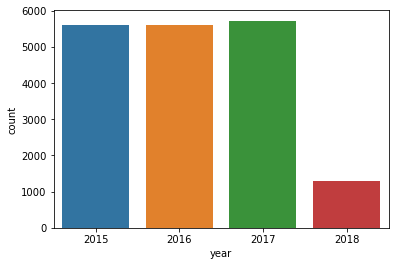

In [11]:
sns.countplot(x='year',data=avocado_df)

In [12]:
# defining new dataframe for using fbprophet
avocado_prophet_df = avocado_df[['Date','AveragePrice']]
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
2807,2015-01-04,0.75
1195,2015-01-04,0.85
10269,2015-01-04,1.50
103,2015-01-04,1.00
1143,2015-01-04,0.80


# making predictions

In [13]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds','AveragePrice':'y'})

In [14]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
2807,2015-01-04,0.75
1195,2015-01-04,0.85
10269,2015-01-04,1.50
103,2015-01-04,1.00
1143,2015-01-04,0.80


In [15]:
m = Prophet()
m.fit(avocado_prophet_df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
# forecast the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

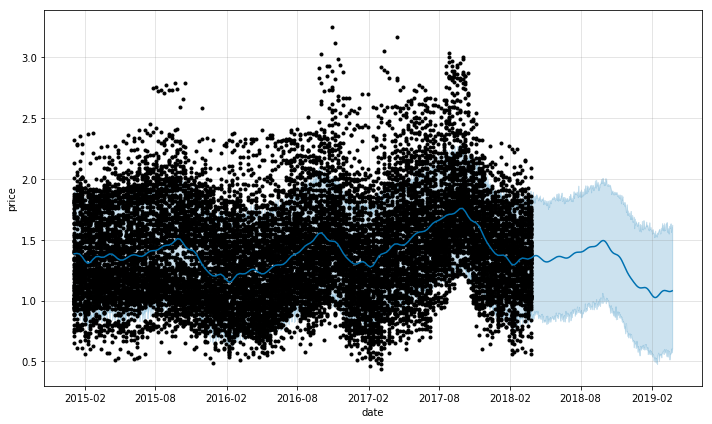

In [17]:
# plot the graph
figure = m.plot(forecast,xlabel='date',ylabel='price')

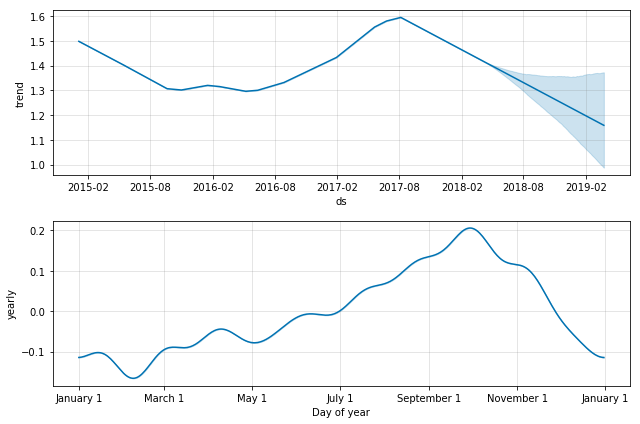

In [19]:
figure = m.plot_components(forecast)